<a href="https://colab.research.google.com/github/Pratyush0210/oibsip_taskno_5/blob/main/sales_prediction_AdvertisingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP**
# **TASK 5**
### **Submitted by :- PRATYUSH KUMAR GARG**

# **Advertising impact on Sales Prediction**
---

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

# Data Loading

In [ ]:
sales = pd.read_csv('/content/Advertising.csv')

In [ ]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sales.drop('Unnamed: 0', axis = 1, inplace = True)

# EDA

In [ ]:
sales.shape

(200, 4)

In [ ]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Correlation

<AxesSubplot: >

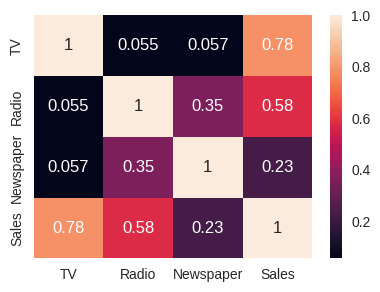

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(sales.corr(),annot=True)

<Figure size 400x300 with 0 Axes>

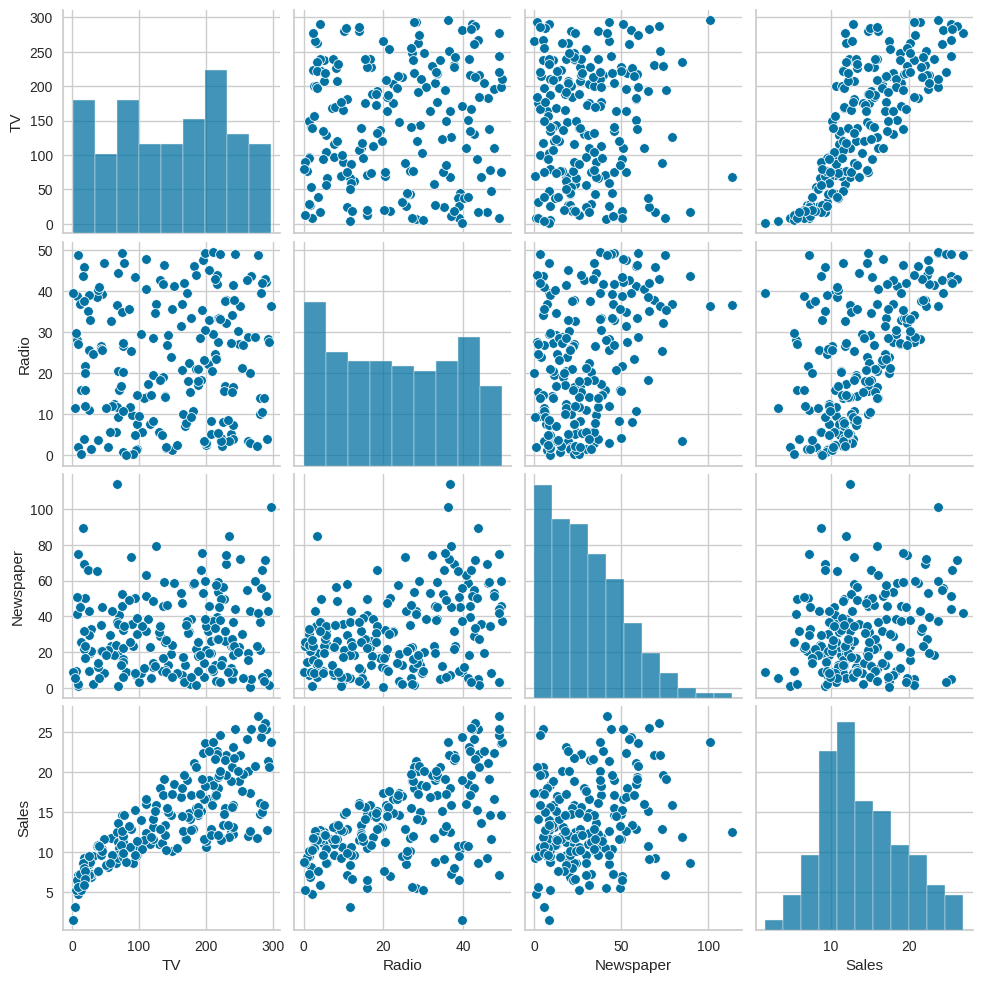

In [ ]:
plt.figure(figsize=(4,3))
sns.pairplot(sales, palette='GnBu')

<AxesSubplot: >

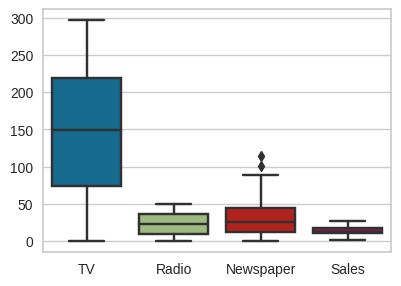

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(sales)

# Outliers

In [ ]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(sales)

,Outlier_percentage
Newspaper,1.0
TV,0.0
Radio,0.0
Sales,0.0


# Comparing Regression Models

In [ ]:
X = sales.drop('Sales', axis = 1)
y = sales['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor


### **Extra Tree Regressor Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
etr.score(X_test, y_test)

0.9809866362510317

### **Gradient Boosting Regressor**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
gbr.predict(X_test[1:11])

array([ 9.22190123,  9.35416118, 25.41390698, 12.2256095 ,  9.2994923 ,
        8.45122747, 12.65956876,  9.1260828 , 16.35303963, 24.60237043])

In [ ]:
gbr.score(X_test, y_test)

0.96633467584432

### **Linear Regression model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.predict(X_test[1:11])

array([ 7.43052335,  6.97152143, 24.16378667, 12.00215643,  6.54334645,
       13.09526331, 14.95879164, 11.00528358, 16.27234553, 22.99324688])

In [ ]:
lr.score(X_test, y_test)

0.8576396745320893

## **Most suited model is Extra tree Regressor**

# Extra Trees Regressor Model

Extra Trees Regressor is an ensemble machine learning algorithm that is used for regression tasks. It is based on the Random Forest algorithm and works by creating a large number of decision trees, each using a random subset of the available features and data. It then combines the predictions of all these decision trees to make a final prediction. One key difference between Extra Trees and Random Forest is that Extra Trees selects the splitting thresholds of each node randomly, rather than searching for the best threshold. This makes Extra Trees faster to train than Random Forests, while still achieving good predictive performance.

# Thank You
----